<div>
    <img src='https://storage.googleapis.com/kaggle-datasets-images/1080334/1818399/4d791ccfa426eb7cb766c08e0b19f359/dataset-cover.jpg' />
</div>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(14,10)})

<h1 id="dataset" style="color:#e26415; background:#c0d3c9;"> 
    <center>Dataset
        <a class="anchor-link" href="#dataset" target="_self">¶</a>
    </center>
</h1>

In [ ]:
path = '../input/cooking-ingredients/train.csv'
df = pd.read_csv(path)
df.head()

In [ ]:
# number of ingredients
nr_ingredients = len(df.iloc[:,0])

features = df.iloc[:, 1:nr_ingredients]
labels = df.iloc[:, 0]

nr_ingredients = len(df.columns) - 1
print("Number of igredients: ", nr_ingredients)

In [ ]:
top_ten_idx = list(features.sum(axis=1).sort_values(ascending=False).index)[:10]

print("Receipes with most ingredients:")
for i,recipe in enumerate(labels[top_ten_idx].values):
    print('{0}. {1}'.format(i + 1, recipe))

In [ ]:
top_receipes_ingredients = [list(features.columns.values[np.where(features.iloc[top_ten_idx[i]] == 1.0)[0]]) for i in range(10)]

<h1 id="definition" style="color:#e26415; background:#c0d3c9;"> 
    <center>Definition
        <a class="anchor-link" href="#definition" target="_self">¶</a>
    </center>
</h1>

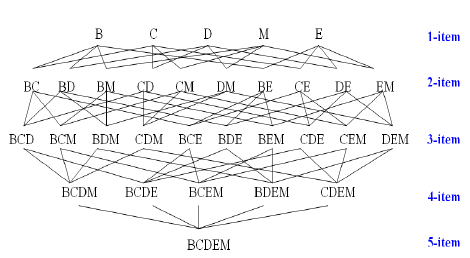

Frequent pattern discovery is part of knowledge discovery in databases, Massive Online Analysis, and data mining; it describes the task of finding the most frequent and relevant patterns in large datasets. The concept was first introduced for mining transaction databases.

<h1 id="implementation" style="color:#e26415; background:#c0d3c9;"> 
    <center>Implementation
        <a class="anchor-link" href="#implementation" target="_self">¶</a>
    </center>
</h1>

In [ ]:
class FPTree():
    
    class Node:
        def __init__(self, name_value, num_occur, parent_node):
            self.name = name_value
            self.count = num_occur
            self.node_link = None
            self.parent = parent_node
            self.children = {} 
   
        def inc(self, num_occur):
            self.count += num_occur
  
        def disp(self, ind=1):
            print ('  '*ind, self.name, ' ', self.count)
            for child in self.children.values():
                child.disp(ind+1)
                
    def __init__(self, data, min_sup):
        self.data = self.init_set(data)
        self.tree, self.header = self.create(self.data, min_sup)
                
    def create(self, data, min_sup=1):
        header = {}

        for trans in data:
            for item in trans:
                header[item] = header.get(item, 0) + data[trans]
        for k in list(header):
            if header[k] < min_sup: 
                del(header[k])
        freq_set = set(header.keys())

        if len(freq_set) == 0: return None, None
        for k in header:
            header[k] = [header[k], None]

        ret_tree = self.Node('Null Set', 1, None)
        for tranSet, count in data.items():
            local_d = {}
            for item in tranSet:
                if item in freq_set:
                    local_d[item] = header[item][0]
            if len(local_d) > 0:
                ordered_items = [v[0] for v in sorted(local_d.items(), key=lambda p: p[1], reverse=True)]
                self.update(ordered_items, ret_tree, header, count)
        return ret_tree, header

    def update(self, items, tree, header, count):
        if items[0] in tree.children:
            tree.children[items[0]].inc(count)
        else:
            tree.children[items[0]] = self.Node(items[0], count, tree)
            if header[items[0]][1] == None:
                header[items[0]][1] = tree.children[items[0]]
            else:
                self.update_header(header[items[0]][1], tree.children[items[0]])
        if len(items) > 1:
            self.update(items[1::], tree.children[items[0]], header, count)

    def update_header(self, test_node, target_node):
        while (test_node.node_link != None):
            test_node = test_node.node_link
        test_node.node_link = target_node

    def init_set(self, data):
        frozen_set = {}
        for trans in data:
            frozen_set[frozenset(trans)] = 1
        return frozen_set

    def ascend_tree(self, leaf_node, prefix_path):
        if leaf_node.parent != None:
            prefix_path.append(leaf_node.name)
            self.ascend_tree(leaf_node.parent, prefix_path)
            
    def find_prefix_path(self, tree):
        cond_pats = {}
        while tree != None:
            prefix_path = []
            self.ascend_tree(tree, prefix_path)
            if len(prefix_path) > 1: 
                cond_pats[frozenset(prefix_path[1:])] = tree.count
            tree = tree.node_link
        return cond_pats

In [ ]:
fptree = FPTree(top_receipes_ingredients, min_sup=3)

<h1 id="frequency" style="color:#e26415; background:#c0d3c9;"> 
    <center>Finding the most frequent ingredients in top 10 receipes
        <a class="anchor-link" href="#frequency" target="_self">¶</a>
    </center>
</h1>

In [ ]:
fptree.tree.disp()

In [ ]:
fptree.find_prefix_path(fptree.header['olive oil'][1])

In [ ]:
fptree.find_prefix_path(fptree.header['apple cider vinegar'][1])